In [1]:
import numpy as np
import random as rm
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, binom, norm
from scipy import integrate
import time

### generalized toy example Self-Interacting

In [3]:
# generalized toy example
def simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon):
    start = time.time()
    def f_pi(x):
        val = 0
        for i in range(len(mu_list)):
            val += alpha_list[i]*norm.pdf(x,mu_list[i], sigma_list[i]**0.5)
        return val

    def pdf_eta(x):
        return f_pi(x)**p

    c = integrate.quad(pdf_eta, -np.inf, np.inf)[0]
    
    def f_eta(x):
        return pdf_eta(x)/c
    
    def g(x):
        return(f_pi(x)/f_eta(x))
    
    def p_kernel(y0, sigma, n):
        count = 0
        Yn = y0
        estimator = [y0]
        while count<n:
            y = np.random.normal(Yn, sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Yn)),1)
            if u <= alpha:
                estimator.append(y)
                Yn = y
                count += 1
        return estimator
    
    def k_kernel(x0, sigma):
        count = 0
        Xn = x0
        estimator = [x0]
        while count<1:
            y = np.random.normal(Xn,sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Xn)),1)
            if u <= alpha:
                estimator.append(y)
                Xn = y
                count += 1
        return estimator[-1]
    
    def sum_g(sum_old, yn):
        return sum_old + g(yn)

    def prob_list(y_value, sum_old, prob_list_old):
        """
        prob_list = [g(i)/sum_new for i in y]
        return prob_list
        """
        a = sum_old/sum_g(sum_old, y_value)
        prob_list = prob_list_old*a
        prob_list = np.append(prob_list, g(y_value)/sum_g(sum_old, y_value))
        return prob_list
    
    def x_sample(x0, epsilon, y0, n, sigma):
        X_list = [0]*n
        X_list[0] = x0
        Y_list = [0]*n
        Y_list[0] = y0
        sum_gs = g(y0)
        Y_list = p_kernel(y0,sigma,n)
        prob_list_Ys = np.array([1])
        
        for k in range(1, n):
            prob_list_Ys = prob_list(Y_list[k], sum_gs, prob_list_Ys)
            sum_gs = sum_g(sum_gs, Y_list[k])
            i = bernoulli(epsilon).rvs(1)
            if i == 0:
                X_list[k] = (k_kernel(x0, sigma))
            else:
                X_list[k] = (np.random.choice(Y_list[:k+1], p = prob_list_Ys))
            x0 = X_list[k]
            
        return X_list
    
    X_list = x_sample(x0, epsilon, y0, n, sigma)
    mean = sum(X_list)/len(X_list)
    
    
    print("total:"+str(time.time() - start))
    
    return [X_list, mean]

In [8]:
mu_list = [0,17.5,10]
sigma_list = [.5,1,0.7]
alpha_list = [0.4,0.2,0.4]
p = 0.75
n = 10000
y0 = 15
x0 = 10
sigma = 10
epsilon = 0.05

X_list1 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list2 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list3 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list4 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list5 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list6 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list7 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list8 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list9 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list10 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
# mean = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[1]

total:131.88128781318665
total:136.75530171394348
total:134.3910310268402
total:134.28374195098877
total:130.14957785606384
total:131.2586750984192
total:129.7422912120819
total:129.04154229164124
total:140.36644887924194
total:129.03260588645935


In [ ]:
print(mean)

In [9]:
print(X_list1)

[10, 9.882710175317891, 9.760821181014087, 8.171749335696127, 1.417076177405944, 10.154865192036183, 9.234852808227611, 17.28964987573665, 18.057302417052718, 16.735083786801106, 10.883743942527019, 10.281279792437537, 8.326702654008773, 16.52553610799231, 20.201579037718506, 14.604420070765471, 9.677900165790021, 17.744993582720976, 11.11476186275414, 10.927168717154963, -1.4361308252987666, 9.586420552873207, 17.934257841463726, 11.223648440027066, 12.283549068288652, 17.508974788868187, 19.05727029900783, 7.745867131341749, -1.6619177428115943, -0.09456635280394221, 2.5542269076476636, 8.791338551078898, 11.364451669431434, 2.312003695914184, 9.731286486504283, 17.32172002182394, 11.165406215637303, 17.85941111149157, 17.30683084332284, 15.713892794122382, 12.067900982021778, 16.789372350671197, 16.780192453623535, 16.239128532940498, 17.78395136531672, -0.06148908450419299, 9.12822837827822, 10.613715897612153, 9.83199557356906, 10.493244783910885, 9.545896256460097, 8.521091739937

In [10]:
print(X_list2)

[10, 0.7134523837404121, 1.18135610038385, 0.27512106100909883, 8.319836283422816, 17.24527669318028, 18.351934536776287, 11.76177682555711, 18.733752113213463, 15.769765633167687, 16.559761021132967, 17.974540093235277, 0.7283434463811133, 0.22172598315456382, 18.749525110114472, 9.649175799977781, 17.974540093235277, -1.064565734502395, 9.751592561752368, -0.9004061353802584, 0.22173821686135198, 0.3655746119819484, 0.4548231076450697, 10.48209102801861, 9.942312195262337, 18.312626669922885, 9.569461583710238, 9.484519594304578, 8.960769746540281, 11.367192698307992, 17.476557881325668, 1.8089532405181572, 9.177878431647837, 1.149610883572139, 9.71355348895847, 17.95043699536526, 10.481424644496382, 16.951313539539804, 17.98815739187342, 10.23242755955142, -0.9634809703657989, -1.0917567189322246, 1.329694191816758, 8.38569302173155, 16.808898294190215, 17.168315160554176, 9.940325704525883, -1.2601965373037736, 1.1693870188338096, 10.926268241816206, 11.341516083689871, -0.56015486

In [11]:
print(X_list3)

[10, 10.84587500712621, 11.405310444981389, 9.821055522608972, 10.645892487740321, 0.025276390088977863, 11.185288108182341, 9.40289490133676, 9.422629391275537, 10.941022504415667, -1.7066476002744402, 8.695514693368821, -0.8312927639444911, -0.05591607700737189, 10.78322462337223, 12.471943854784373, -0.6026899473776712, -0.6482747609953897, 17.842072325586408, 10.407526791586795, 18.19796691836956, 15.790729210893065, 17.05856074044323, 18.267394934846216, 10.617398430646466, 16.321923597820604, 9.798426098385441, -0.755384858917088, 0.7425210384159913, 0.3866486103796746, -0.42711561355728733, 0.5655007648555975, 11.068089955686139, 10.808195629947166, 10.648373145957109, 10.581221431505192, 11.377959053453072, 9.9500104132761, 17.990557745531728, 9.918245171901438, 17.27971350523799, 16.784457918597088, 18.584339285763615, 7.972150507908395, 11.81688438889691, 0.3459936266229313, 10.313644172134971, 16.988056631500946, 17.06047111455863, 11.274200451104868, 18.250759053279342, 8.6

In [12]:
print(X_list4)

[10, 11.823573235123476, 10.44340467886345, 8.502235852619155, -1.119618652240229, 9.130283043110493, 11.2668923159231, 17.39442576677606, 11.496709594848008, 9.154717872772014, 11.392432399403855, 8.772975436329144, 9.74029813275627, 8.553824796941937, 17.684742624369747, 17.3154847098739, 18.21254085542355, 11.137125455093651, 17.86172258001092, 17.1137004052012, 7.981729761996512, 0.44262763372479696, 9.788787388129727, -0.22304754222145284, 9.105601802577146, 8.255796199687554, 10.761432160980952, 10.13181158406895, 17.95289959371273, 11.318263743372196, 18.504935067278907, -2.0104136990603294, -0.5815190728272814, -0.6361773525162674, 1.2819605260912783, 9.674909828973504, 17.04758552264364, 11.790126006700639, 8.280866299130066, 19.20706070531004, 19.195950572797077, 19.366115278291137, 11.143882397982582, 0.6069380888299971, 0.8135780303313072, 10.952227132525042, 17.49344490438036, -1.3047431587289609, -1.088905389589708, 10.519325367983745, 9.403878382268593, 11.33220048724000

In [13]:
print(X_list5)

[10, 0.023558673184906453, -0.5028275433742866, -0.5014149298577197, -1.0294743749906041, 10.598004335000448, 9.62436445919748, -0.7677497182269484, 0.08997286913122549, -0.6346652270225858, -1.1591766580058533, 9.70119543503963, 10.228783229402245, 8.216877362498419, 1.5227928438435807, 17.498621556446658, -0.8620849602626812, -1.3382715143744817, 0.18877164629264898, -0.27124815908163896, -0.3290114440924122, 0.40665173182416686, 17.116213651698345, 18.07529973023059, 16.79440264166886, 18.34502911199421, 17.809537330237855, 10.723109366936843, 9.592521207574588, -0.04292821478870579, -0.07708573252888798, 10.138551694151527, -0.3893499193409493, -0.06377060721372912, -1.152064641818702, 0.8968543499937014, 9.887669182641018, -0.2182447009181363, 9.723777766858806, 9.581693523359721, 10.278742588111946, 17.054820961385627, 18.0212021775602, 0.35944133624374786, 0.4683668669290247, 10.024331958942366, 0.46550440398603143, -1.1378895584751239, -0.27284083866836695, -0.05017257018871568

In [14]:
print(X_list6)

[10, 20.019319744282747, 19.240123722866887, 15.0, 19.03959253569678, 18.249032268279496, 16.363227214218465, 8.252444601968342, -1.4759159570525107, 8.028834939068263, 8.224101250886768, 17.911106389636515, 7.71802799563288, 14.392488556720089, 15.59323690398802, 14.851382464786422, -0.47361563722472866, 10.198301286488299, 9.035435938535866, 1.2454450122289176, 9.25022472413944, 17.73084630221853, 10.962856039563576, 15.19188513481093, 18.37130074277226, 17.366972417473566, 9.856039415239248, 17.672812090771515, 0.9279880842443085, 9.15140944376299, 14.11720725379325, 1.1111108322221028, 0.4647183345878445, 0.8200445555083228, 0.3267440279265219, 0.2620896319361704, 1.2503430858348077, 17.91415166692465, 10.010274929092624, 10.172600991996733, -1.0830874240096087, -0.6148332259030473, 10.4448588243507, 9.539450049961653, 17.5667883738393, 8.0576220151212, 1.1126160709239548, -0.7023023511382012, 19.548711400519238, 6.927947419067204, 9.377265060110862, 16.280536188416278, 16.30190514

In [15]:
print(X_list7)

[10, 0.2396883753608634, 10.704300882232266, 0.5742984419885264, 9.9026341955734, 10.664533614000495, 18.25733036680314, 10.61034786458756, 0.0614808410226928, 9.44384839353745, 10.499589155244529, 9.447440498837333, 7.978315983352629, -0.982743321210239, 8.511581913480725, 18.80575435228956, 2.114925142855572, 12.37401341778842, 18.249917039567787, 16.32554477212136, 12.049851865777903, 10.189812681109448, 17.214881419551837, 0.37717491278058546, 17.366222761492676, -0.024189374350051196, 1.217795058450592, 9.13954994805254, -0.6234949317091107, 0.10604809583208197, 9.248942827416974, 10.334000335228577, 0.5221983803336023, -0.09905611148266846, 9.72212352317959, -1.5116288859301896, 11.527650516385874, 0.8202030859662734, -1.3415195909616826, 11.442179906573434, 9.269024992978624, -0.34801005990838085, -1.5693876692391242, -0.319659245692794, 0.3184826582585458, 10.514806012046636, 16.917801340814606, 18.14318420454596, 18.167166234864975, 16.81827457207761, -0.09539636326012868, 0.6

In [16]:
print(X_list8)

[10, 0.3724800173390346, 10.065358938205033, 9.675315225627514, 0.8883223985554896, -0.9726216962793286, 10.069037905203825, 17.442999238404646, 9.433610313117985, 0.21708238701872418, 10.657104431574489, 17.337292388719092, 17.164975950642685, 19.026573941031707, 8.44193415554164, 9.442765643286874, 16.05980224692945, 0.16334418688097152, -0.3751378852736982, 0.4835757331487388, 0.6596544739643592, 9.18422473697009, 9.35549485592521, 10.333746012362967, -0.598725580472367, 0.45632775455013497, 10.597599334721032, 17.98228955115512, 10.244793866260466, -1.4627251236240646, 15.637921463417712, 0.9540469462219965, 1.0555690467408572, -0.6483674813308007, 11.351862745474016, 7.9569131060186145, 19.921482040775462, 16.05181329052656, 9.878721360927418, 8.976418022222571, 9.594876915804608, 16.40518142646856, 9.929525347482027, 11.534508661313268, 16.208239667355578, 0.5698174604606869, -1.6680244044024914, 8.831994781871456, 19.252045386134423, 11.00355039406874, 10.38179227059611, -0.3657

In [17]:
print(X_list9)

[10, 9.551599364992887, -1.1634020853132743, 8.9984021163648, 11.493437664323144, 16.138749536787824, 11.17051297565505, 12.29778864396289, 12.529537517451448, 2.74738287455064, 10.605833356143835, 19.463885908779922, 10.961164563957487, 11.336458081778401, 18.136110012497696, 11.419890152084095, 17.319978119119735, 18.2415568777003, 11.392237617502094, 0.03401909480555254, -0.8078503194539028, 0.36838090791203126, -1.3391976409185116, 7.983956745307692, -1.3151004281697158, 0.41068064587608544, -0.4308775826124285, 9.33881912310247, 10.249526505542603, 9.770468056915485, 17.66069264139042, 17.616558399059265, 9.865740436653683, 8.76517524623867, -1.0230752285144362, 9.81469888611411, 10.88780857605671, 16.922327430645417, 16.98821658915916, 17.0786946437615, 17.782887581692226, 10.389869953920089, 15.42163002324013, 1.4668243677462733, 10.51692047783147, 10.945536461683977, 10.257522567441917, -0.3275427728455451, -0.36737364997308386, 17.291898330129314, 10.403906705476683, 17.882144

In [18]:
print(X_list10)

[10, 16.25901135076109, 17.264746829445947, 16.9130810164812, 19.82563533441162, 16.874951704517287, 20.058239398419214, 16.08055385076487, 11.54644307182298, -0.8835181580956348, -0.6021671585656683, -0.8779106752582866, 8.967354444750363, 15.979266841195642, 8.650383861545501, -0.24318529543278888, 0.3803065302778452, -1.6871637826391233, 16.500754938798174, 16.63981331072081, 9.146647346934152, 10.50631325911346, 1.0790167830443007, 8.906335647114997, -1.4878108487642923, 0.6272417158226347, 0.7166122297430229, 9.109116884781347, -0.24318529543278888, 0.4716326625888069, 8.599165212151485, 15.036797955239773, 7.893495735694329, -0.008494331530113364, 1.049052977185563, 0.6853471027686613, 0.8184757288722363, 11.26664227552427, 8.58122136023284, -0.5089545118080139, 8.693647046414636, 18.77165905286528, 16.698703421483554, 10.86523628581352, 1.1626465774800585, 0.03655166509004282, 1.5096711561616676, -0.29239377050635995, 0.04573528807946825, -0.4369910747799197, 0.30429409008110575

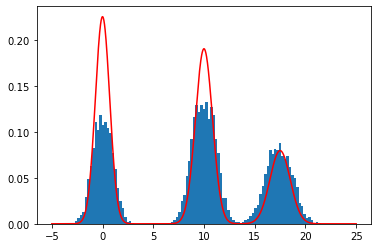

In [31]:
# plot
pdf_pi = lambda x: 0.4*(1/np.sqrt(2*math.pi*0.5))*np.exp((-1/2)*((x-0)**2/0.5)) + 0.2*(1/np.sqrt(2*math.pi*1))*np.exp((-1/2)*((x-17.5)**2/1))+0.4*(1/np.sqrt(2*math.pi*0.7))*np.exp((-1/2)*((x-10)**2/0.7))

plt.hist(X_list10, density = True, bins = 100)
t = np.linspace(-5,25,1000)
vals = pdf_pi(t)
plt.plot(t,vals, 'r')


### many particles, $x_i$ with $y_i$ Parallel

In [6]:
# x_i move according to y_i
def simulate_list1(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N):
    start = time.time()
    
    def f_pi(x):
        val = 0
        for i in range(len(mu_list)):
            val += alpha_list[i]*norm.pdf(x,mu_list[i], sigma_list[i]**0.5)
        return val
    

    def pdf_eta(x):
        return f_pi(x)**p

    c = integrate.quad(pdf_eta, -np.inf, np.inf)[0]
    
    def f_eta(x):
        return pdf_eta(x)/c
    
    def g(x):
        return(f_pi(x)/f_eta(x))
    
    '''
    def p_kernel_adjust(y0_list, sigma, n):
        Yn_list = y0_list
        estimator_matrix = np.empty((0,n), int)
        for i in range(len(Yn_list)):
            count = 0
            estimator_list = [y0_list[i]]
            Yn_list = y0_list
            while count<n:
                y = np.random.normal(Yn_list[i], sigma)
                u = np.random.uniform(0,1)
                alpha = (min((pdf_eta(y)/pdf_eta(Yn_list[i])),1))
                if u <= alpha:
                    estimator_list.append(y)
                    Yn_list[i] = y
                    count += 1
            estimator_matrix = np.append(estimator_matrix, [estimator_list[1:]], axis=0)
        return estimator_matrix

    def k_kernel_adjust(x0_list,sigma):
        Xn_list = x0_list
        estimator_matrix = np.empty((0,2), int)
        for i in range(len(Xn_list)):
            count = 0
            estimator_list = [x0_list[i]]
            Xn_list = x0_list
            while count<1:
                y = np.random.normal(Xn_list[i],sigma)
                u = np.random.uniform(0,1)
                alpha = min((pdf_eta(y)/pdf_eta(Xn_list[i])),1)
                if u <= alpha:
                    estimator_list.append(y)
                    Xn_list[i] = y
                    count +=1
            estimator_matrix = np.append(estimator_matrix, [estimator_list], axis=0)
        return estimator_matrix
    '''
    
    def p_kernel(y0, sigma, n):
        count = 0
        Yn = y0
        estimator = [y0]
        while count<n:
            y = np.random.normal(Yn, sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Yn)),1)
            if u <= alpha:
                estimator.append(y)
                Yn = y
                count += 1
        return estimator
    
    def k_kernel(x0, sigma):
        count = 0
        Xn = x0
        estimator = [x0]
        while count<1:
            y = np.random.normal(Xn,sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Xn)),1)
            if u <= alpha:
                estimator.append(y)
                Xn = y
                count += 1
        return estimator[-1]
    
    def sum_g(sum_old, yn):
        return sum_old + g(yn)

    def prob_list(y_value, sum_old, prob_list_old):
        a = sum_old/sum_g(sum_old, y_value)
        prob_list = prob_list_old*a
        prob_list = np.append(prob_list, g(y_value)/sum_g(sum_old, y_value))
        return prob_list
    
    def x_sample(x0_list, epsilon, y0_list, n, sigma, N):
        X_matrix = np.empty((0,n),int)
        Y_matrix = np.empty((0,n),int)
        for i in range(N):
            sum_gs = g(y0_list[i])
            X_list = [x0_list[i]]
            Y_list = p_kernel(y0_list[i], sigma, n)
            prob_list_Ys = np.array([1])
            for k in range(1, n):
                prob_list_Ys = prob_list(Y_list[k], sum_gs, prob_list_Ys)
                sum_gs = sum_g(sum_gs, Y_list[k])
                j = bernoulli(epsilon).rvs(1)
                if j == 0:
                    X_list.append(k_kernel(x0_list[i], sigma))
                else:
                    X_list.append(np.random.choice(Y_list[:k+1], p = prob_list_Ys))
            X_matrix = np.append(X_matrix, [X_list], axis=0)
            x0_list[i] = X_matrix[i][-1]
        return X_matrix
    
    X_matrix = x_sample(x0_list, epsilon, y0_list, n, sigma, N)
    mean = X_matrix.sum()/X_matrix.size
    
    print("total:"+str(time.time() - start))
    
    return [mean, X_matrix.flatten()]

In [9]:
mu_list = [0,17.5,10]
sigma_list = [.5,1,0.7]
alpha_list = [0.4,0.2,0.4]
p = 0.75
n = 100
y0_list = [15, -5, 12, 1, -2]
x0_list = [10, 13, -4, -2, 3]
sigma = 10
epsilon = 0.05
N = 1

X_list = simulate_list1(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
mean = simulate_list1(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[0]

total:1.4104530811309814
total:1.0229871273040771


In [10]:
print(mean)

10.32900262193171


In [11]:
print(X_list)

[ 1.00000000e+01  6.91878996e-01  2.50246787e-01  9.73610583e+00
  9.82362903e+00  1.03419478e+01  9.83553930e+00  6.02093075e-01
  1.46873479e+01 -3.09749280e-01 -1.75693841e+00 -4.22994725e-01
  1.02683690e+01  1.76510906e+01  9.84769913e+00  1.11759543e+00
  1.62413778e+01  9.76765321e+00  1.68138804e+01 -4.72891183e-01
  1.02091597e+01  3.41362530e-01  3.49324183e-01  1.02401777e+01
  1.20897697e+00  7.55932639e-02  9.03326777e+00  9.23937410e+00
  1.06303036e+01  1.61479962e+01  9.13559902e+00  1.12313536e+01
  1.81048028e+01 -1.28045008e+00  4.09810091e-01  1.11412269e+01
 -7.18397316e-01  1.07918311e+01  1.06309073e+01 -6.42348993e-01
  1.00089992e+01  1.14727229e+01  9.64371486e+00  9.86034038e+00
  8.49654261e+00  1.73098842e+01  1.68516282e+01  1.66095939e+01
  8.70676013e+00  9.97984237e+00  1.07630358e+01  9.99206912e+00
  1.21808004e+00 -1.04914822e+00  9.71919831e+00  1.74604973e+01
  1.01726770e+01  1.03081100e+01  9.29845610e+00  1.86847513e+01
  8.64012185e+00  1.07686

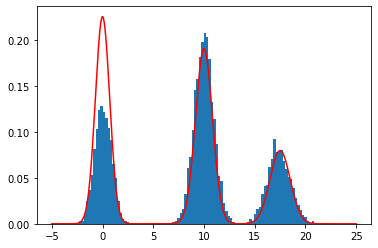

In [17]:
pdf_eta = lambda x: 0.4*(1/np.sqrt(2*math.pi*0.5))*np.exp((-1/2)*((x-0)**2/0.5)) + 0.2*(1/np.sqrt(2*math.pi*1))*np.exp((-1/2)*((x-17.5)**2/1))+0.4*(1/np.sqrt(2*math.pi*0.7))*np.exp((-1/2)*((x-10)**2/0.7))

plt.hist(X_list, density = True, bins = 100)
t = np.linspace(-5,25,1000)
vals = pdf_eta(t)
plt.plot(t,vals, 'r')

### all $ys$ past positions Auxiliary

In [33]:
# x_i move according to all ys
def simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N):
    start = time.time()
    
    def f_pi(x):
        val = 0
        for i in range(len(mu_list)):
            val += alpha_list[i]*norm.pdf(x,mu_list[i], sigma_list[i]**0.5)
        return val

    def pdf_eta(x):
        return f_pi(x)**p

    c = integrate.quad(pdf_eta, -np.inf, np.inf)[0]
    
    def f_eta(x):
        return pdf_eta(x)/c
    
    def g(x):
        return(f_pi(x)/f_eta(x))
    
    '''
    def p_kernel_adjust(y0_list, sigma, n):
        Yn_list = y0_list
        estimator_matrix = np.empty((0,n), int)
        for i in range(len(Yn_list)):
            count = 0
            estimator_list = [y0_list[i]]
            Yn_list = y0_list
            while count<n:
                y = np.random.normal(Yn_list[i], sigma)
                u = np.random.uniform(0,1)
                alpha = (min((pdf_eta(y)/pdf_eta(Yn_list[i])),1))
                if u <= alpha:
                    estimator_list.append(y)
                    Yn_list[i] = y
                    count += 1
            estimator_matrix = np.append(estimator_matrix, [estimator_list[1:]], axis=0)
        return estimator_matrix

    def k_kernel_adjust(x0_list,sigma):
        Xn_list = x0_list
        estimator_matrix = np.empty((0,2), int)
        for i in range(len(Xn_list)):
            count = 0
            estimator_list = [x0_list[i]]
            Xn_list = x0_list
            while count<1:
                y = np.random.normal(Xn_list[i],sigma)
                u = np.random.uniform(0,1)
                alpha = min((pdf_eta(y)/pdf_eta(Xn_list[i])),1)
                if u <= alpha:
                    estimator_list.append(y)
                    Xn_list[i] = y
                    count +=1
            estimator_matrix = np.append(estimator_matrix, [estimator_list], axis=0)
        return estimator_matrix
    '''
    
    def p_kernel(y0, sigma, n):
        count = 0
        Yn = y0
        estimator = [y0]
        while count<n:
            y = np.random.normal(Yn, sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Yn)),1)
            if u <= alpha:
                estimator.append(y)
                Yn = y
                count += 1
        return estimator
    
    def k_kernel(x0, sigma):
        count = 0
        Xn = x0
        estimator = [x0]
        while count<1:
            y = np.random.normal(Xn,sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Xn)),1)
            if u <= alpha:
                estimator.append(y)
                Xn = y
                count += 1
        return estimator[-1]
    
    def sum_g(sum_old, yn):
        sum_new = sum_old + g(yn)
        return sum_new
    
    def prob_matrix_new(Y_matrix, sum_new):
        prob_matrix = np.zeros((len(Y_matrix),len(Y_matrix[0])))
        for i in range(len(Y_matrix[0])):
            for j in range(len(Y_matrix)):
                prob_matrix[j][i] = g(Y_matrix[j][i])/sum_new
        return prob_matrix
    
    def prob_matrix(Y_list, sum_old, prob_matrix_old):
        g_value = 0
        for i in (Y_list):
            g_value += g(i)
        sum_new = sum_old+g_value
        a = sum_old/sum_new
        prob_matrix = prob_matrix_old*a
        for i in range(len(Y_list)):
            Y_list [i] = g(Y_list[i])/sum_new
        prob_matrix = np.insert(prob_matrix,len(prob_matrix[0])-1,Y_list,axis=1)
        return prob_matrix
    
    def bernoulli_list(epsilon, n):
        b_list = bernoulli(epsilon).rvs(n)
        return b_list
    
    def x_sample(x0_list, epsilon, y0_list, n, sigma, N):
        X_matrix = np.empty(shape=(N,0),dtype='float')
        Y_matrix = np.empty(shape=(N,0),dtype='float')
        Y_matrix = np.insert(Y_matrix,0,y0_list,axis=1)
        X_matrix = np.insert(X_matrix,0,x0_list,axis=1)
        sum_Gs = 0
        Prob_matrix = np.empty(shape=(N,0),dtype='float')
        Prob_list = []
        
        for i in (y0_list):
            sum_Gs += g(i)
            
        for i in y0_list:
            Prob_list.append(g(i)/sum_Gs)
        Prob_matrix = np.insert(Prob_matrix, 0, Prob_list, axis=1)
        
        for i in range(n):
            sum_g = 0
            y_list = []
            x_list = []
            for j in range(N):
                y_list.append(p_kernel(Y_matrix[j][-1], sigma, 1)[-1])
                sum_g += g(y_list[j])
                
            Y_matrix = np.insert(Y_matrix, len(Y_matrix[0])-1, y_list, axis=1)
            Prob_matrix = prob_matrix(Y_matrix[:,i], sum_Gs, Prob_matrix)
            Y_matrix_flatten = Y_matrix.flatten()
            Prob_matrix_flatten = Prob_matrix.flatten()
            sum_Gs += sum_g
            
            for j in range(N):
                b = bernoulli(epsilon).rvs(1)
                if b == 0:
                    x_list.append(k_kernel(X_matrix[j][-1], sigma))
                if b == 1:
                    x_list.append(np.random.choice(Y_matrix_flatten, p = Prob_matrix_flatten))
            
            X_matrix = np.insert(X_matrix, len(X_matrix[0])-1, x_list, axis=1)
            
        return X_matrix
    
    def E_x(X_matrix):
        sum_matrix = X_matrix.sum()
        len_matrix = X_matrix.size
        average_matrix = sum_matrix/len_matrix
        return average_matrix
    
    X_matrix = x_sample(x0_list, epsilon, y0_list, n, sigma, N)
    mean = X_matrix.sum()/X_matrix.size
    
    print("total:"+str(time.time() - start))
    
    return mean, X_matrix.flatten()

In [35]:
mu_list = [0,17.5,10]
sigma_list = [.5,1,0.7]
alpha_list = [0.4,0.2,0.4]
p = 0.75
n = 100
y0_list = [15, 5, 2, 11, 2]
x0_list = [10,3,14,-2,13]
sigma = 10
epsilon = 0.05
N = 5

X_list11 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list12 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list13 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list14 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list15 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]

# mean = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[0]
# print(mean)

total:6.675249099731445
total:6.830587863922119
total:5.115383148193359
total:5.123700141906738
total:4.762595891952515


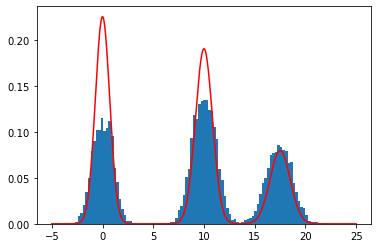

In [36]:
pdf_pi = lambda x: 0.4*(1/np.sqrt(2*math.pi*0.5))*np.exp((-1/2)*((x-0)**2/0.5)) + 0.2*(1/np.sqrt(2*math.pi*1))*np.exp((-1/2)*((x-17.5)**2/1))+0.4*(1/np.sqrt(2*math.pi*0.7))*np.exp((-1/2)*((x-10)**2/0.7))

plt.hist(X_list, density = True, bins = 100)
t = np.linspace(-5,25,1000)
vals = pdf_pi(t)
plt.plot(t,vals, 'r')